### 로버스트 선형회귀

> 최소제곱법은 이상점에 강건(Robust)하지 못함.

`-` 최소제곱추정량(OLSE)

$$Y_i = \beta_0 + \beta_1 X_{1i} + \cdots \beta_p X_{pi} + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, n$$

`-` 최대우도추정량(MSE) : 최대가능도추정량

$$\hat{\beta}^{MSE} = \underset{\beta}{arg ~ max} ~ L = \Pi_{i=1}^{n}f(\epsilon_i) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp(- \frac{\Sigma_{i=1}^{n}\epsilon_i^2}{2\sigma^2}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp (- \frac{\Sigma_{i = 1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2})$$

> 결과는 최소제곱추정량과 동일(분산만 다름)

 $L$은 결합확률밀도함수, $ln L$은 로그가능도함수


`-` 두 추정량의 단점 : 이상값에 민감함(저항성이 없음)

**M-추정량** : 최우추정량의 형태로서 이상값에 강건한 추정량.

$$L = \Pi_{i=1}^{n}f(\epsilon_i) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp(- \frac{\Sigma_{i=1}^{n}\epsilon_i^2}{2\sigma^2}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp (- \frac{\Sigma_{i = 1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2}) \approx \frac{1}{\sqrt{2 \pi \sigma^2}} \exp (- \Sigma_{i = 1}^{n}(\frac{r_i}{\sigma})^2)$$

> 어차피 로그우도함수를 미분하는 것이므로 상수는 제거해도 해에는 변함없음.

$$let ~ \rho_0(z) = z^2, ~ $$

> 최소제곱법은 $z^2$의 합을 최소화하는 것이므로, 우도함수가 $\rho_0(z)$의 합으로 정의된다.

$$\begin{align} \rho_1(z) & = z^2, ~ ~~~~~~ |z| < c, \\ 
                         & = c(2|z| - c), ~ o.w.
\end{align}$$

$$\hat{\beta}_0, \hat\beta_1 = arg ~ \underset{\beta_0, \beta_1}{min} \Sigma_{i=1}^{n} \rho_1(\frac{r_i}{\tilde{\sigma}})$$

> $p_1(z)$에서 $p_1$이라는 함수에 $\frac{r_i}{\tilde{\sigma}}$를 넣은 형태이다.

$$\tilde \sigma = median(|r1|, \cdots, |r_n|)/0.675$$

In [4]:
set.seed(1234567)
x = seq(1, 10)
y = -2.5 + 0.5*x + rnorm(10, 0, 1)
y[10] = -10

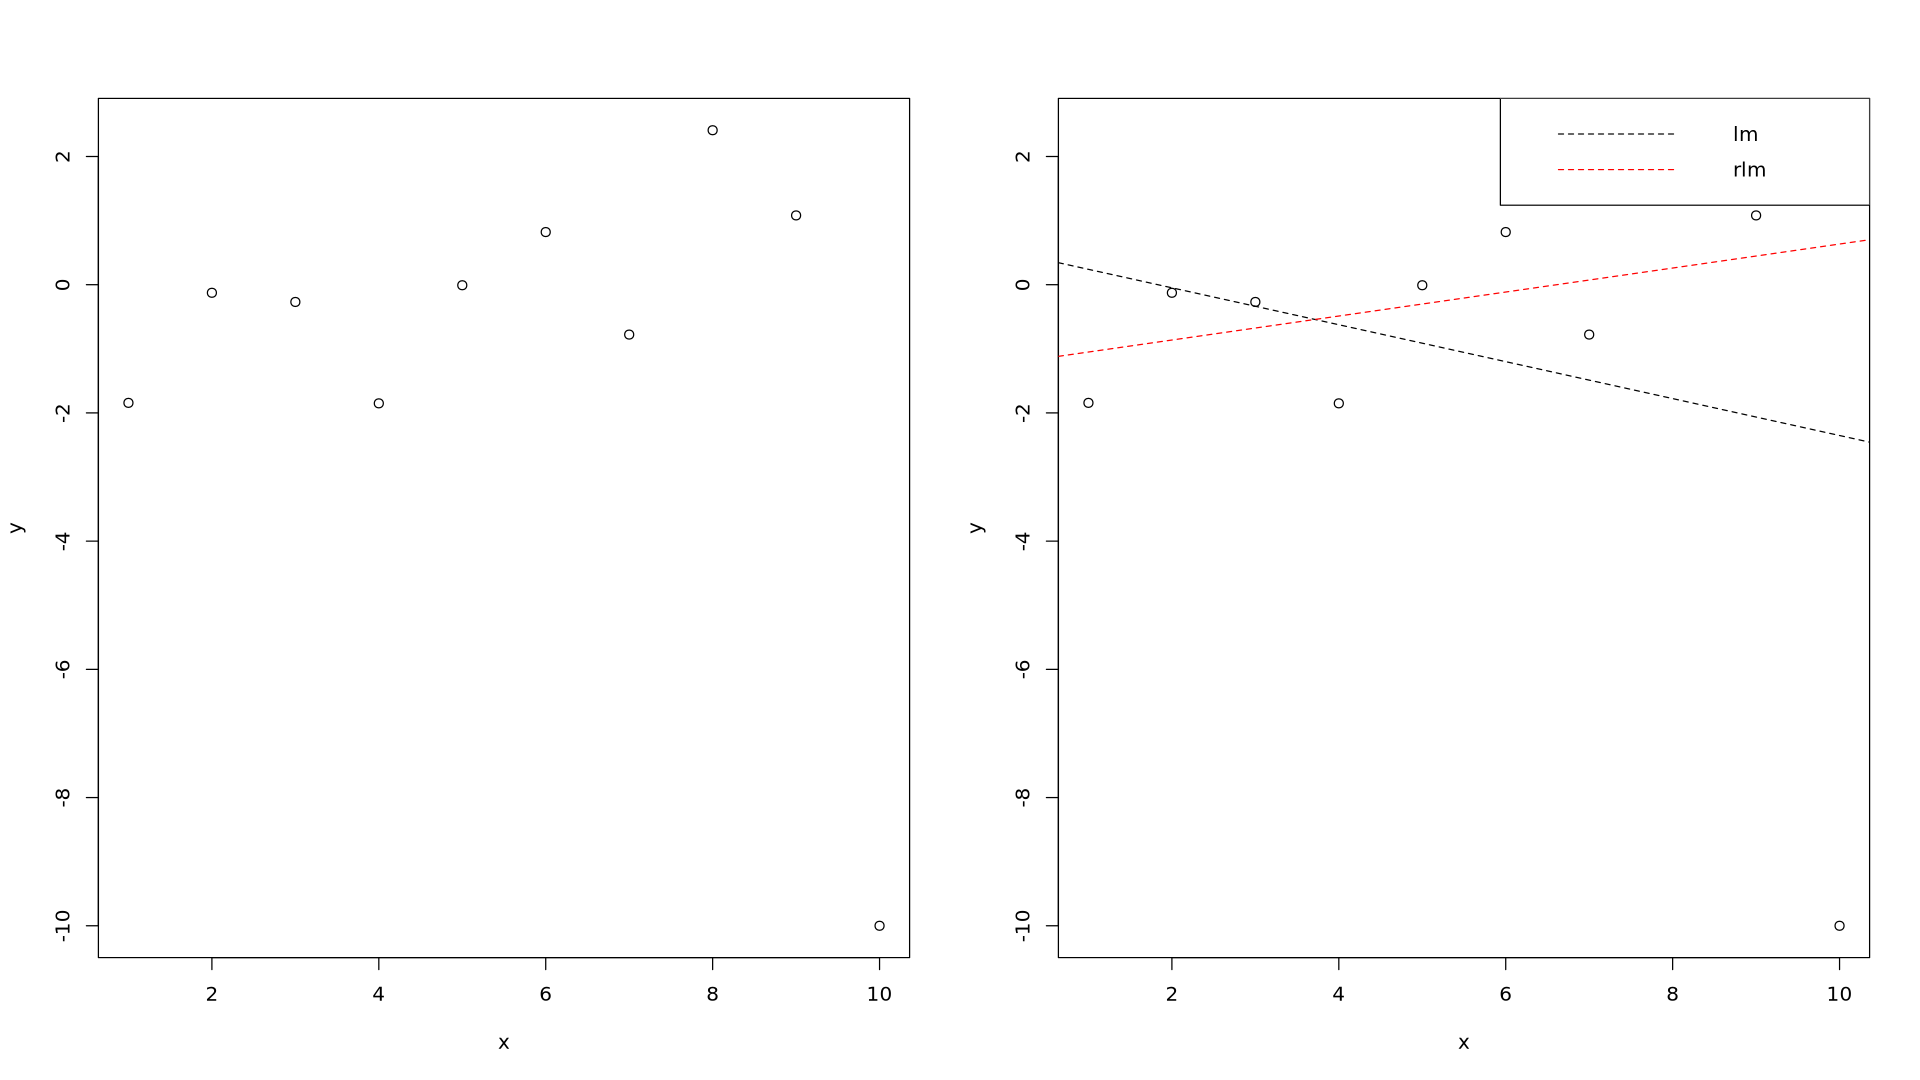

In [14]:
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfcol = c(1, 2))


library(MASS)
m0 <- lm(y~x)
m1 <- rlm(y~x)

plot(y~x)
plot(y~x)
abline(m0, lty = 2)
abline(m1, lty = 2, col = 'red')
legend(x = "topright", legend = c('lm', 'rlm'), col = c('black', 'red'), lty = 2)

In [15]:
summary(m1)


Call: rlm(formula = y ~ x)
Residuals:
     Min       1Q   Median       3Q      Max 
-10.6341  -0.8364   0.3499   0.7111   2.1497 

Coefficients:
            Value   Std. Error t value
(Intercept) -1.2375  1.0400    -1.1899
x            0.1872  0.1676     1.1167

Residual standard error: 1.218 on 8 degrees of freedom

In [16]:
x

[1]  1  2  3  4  5  6  7  8  9 10

In [17]:
y

[1]  -1.843296231  -0.126188809  -0.269329756  -1.850800927  -0.008514961
 [6]   0.820981863  -0.778148409   2.409503835   1.080595664 -10.000000000

In [19]:
z = (y - mean(y))/sd(y)
z

[1] -0.23144675  0.27367632  0.23156841 -0.23365442  0.30829254  0.55230638
 [7]  0.08188876  1.01960335  0.62867721 -2.63091180

In [24]:
rlm(y~x, c = 1)

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
“some of ... do not match”


Call:
rlm(formula = y ~ x, c = 1)
Converged in 9 iterations

Coefficients:
(Intercept)           x 
 -1.2374752   0.1871622 

Degrees of freedom: 10 total; 8 residual
Scale estimate: 1.22 

In [25]:
z^2 < 1.345

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE

In [26]:
psi_0 <- function(z) {z^2}
psi_1 <- function(z) {
    c <- 1.345
    ifelse(abs(z) < c, z^2, c*(2*abs(z) - c))
}

function(z) {z^2}

function(z) {
    c <- 1.345
    ifelse(abs(z) < c, z^2, c*(2*abs(z) - c))
}

In [55]:
deriv(M, c("beta_0", "beta_1"))

ERROR: Error in deriv.default(M, c("beta_0", "beta_1")): invalid expression in 'FindSubexprs'


In [53]:
M <- function(beta_0, beta_1) {
    z = (y - beta_0 - beta_1 * x)/(medina(y - beta_0 - beta_1 * x)/0.675)
    c = 1.345
    p = ifelse(abs(z) < c, z^2, c*(2*abs(z) - c))
    return(p)
}

`-` LMS(least median of square) 추정량 : 잔차제곱의 중앙값을 최소화하는 통계량을 구함, 손으로 계산하긴 어려움.

$$arg~ min~~ median(r_1^2, r_2^2, \cdots, r_n^2)$$

> 이상점에는 강건하지만, 추정치가 몬테카를로 반복시행에 의해 얻어지기 때문에 불안정함.

In [33]:
m2 <- lqs(y~x, method = 'lms')

어느 추정량이 좋은지 보려면 이상치를 제거하고 오차제곱합을 비교

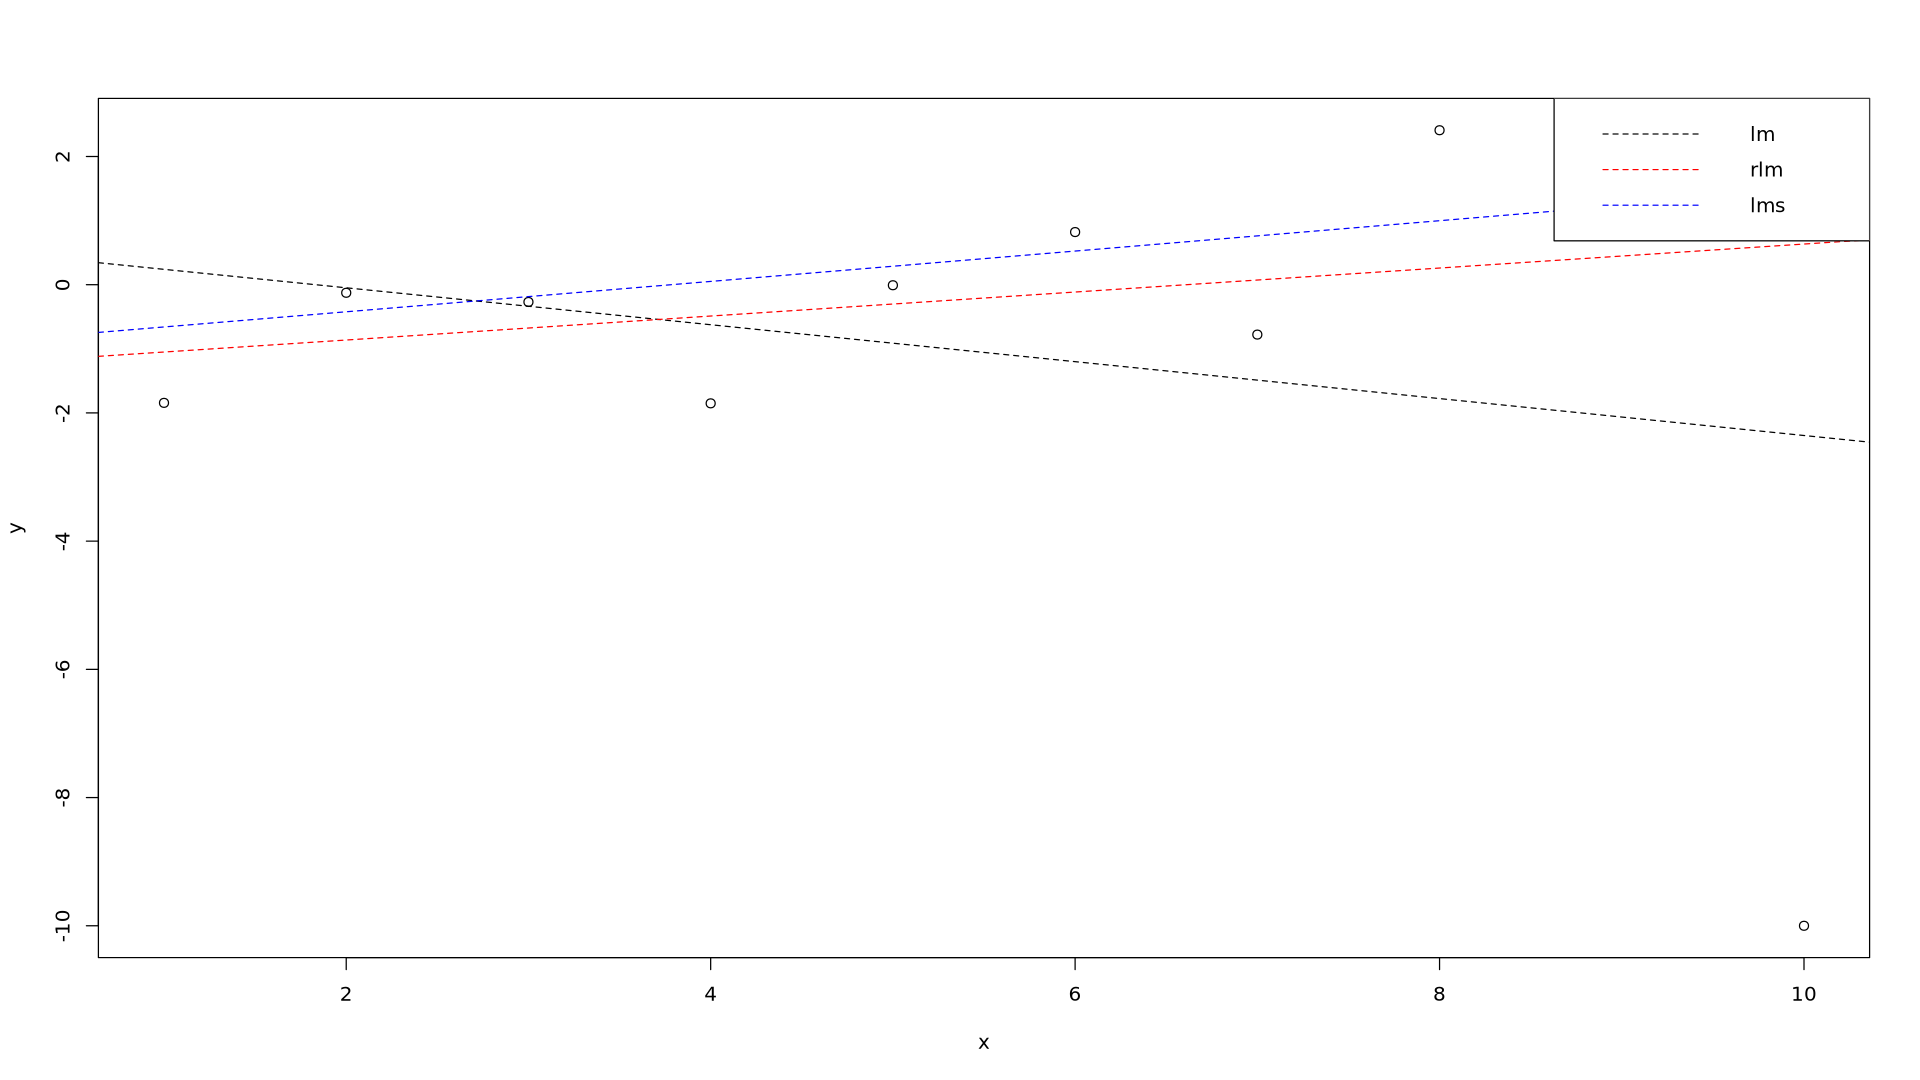

In [34]:
plot(y~x)
abline(m0, lty = 2)
abline(m1, lty = 2, col = 'red')
abline(m2, lty = 2, col = 'blue')
legend(x = "topright", legend = c('lm', 'rlm', 'lms'), col = c('black', 'red', 'blue'), lty = 2)

`-` LTS(least trimmed squares) 최소절삭제곱 : LMS 방법을 사용하되, 이상값에 해당하는 자료를 버리고 추정

$$arg ~ min ~~ \Sigma_{i=1}^{q}r_{(i)}^2, ~ q = n\times 0.75; \frac12 < p ≤ n$$

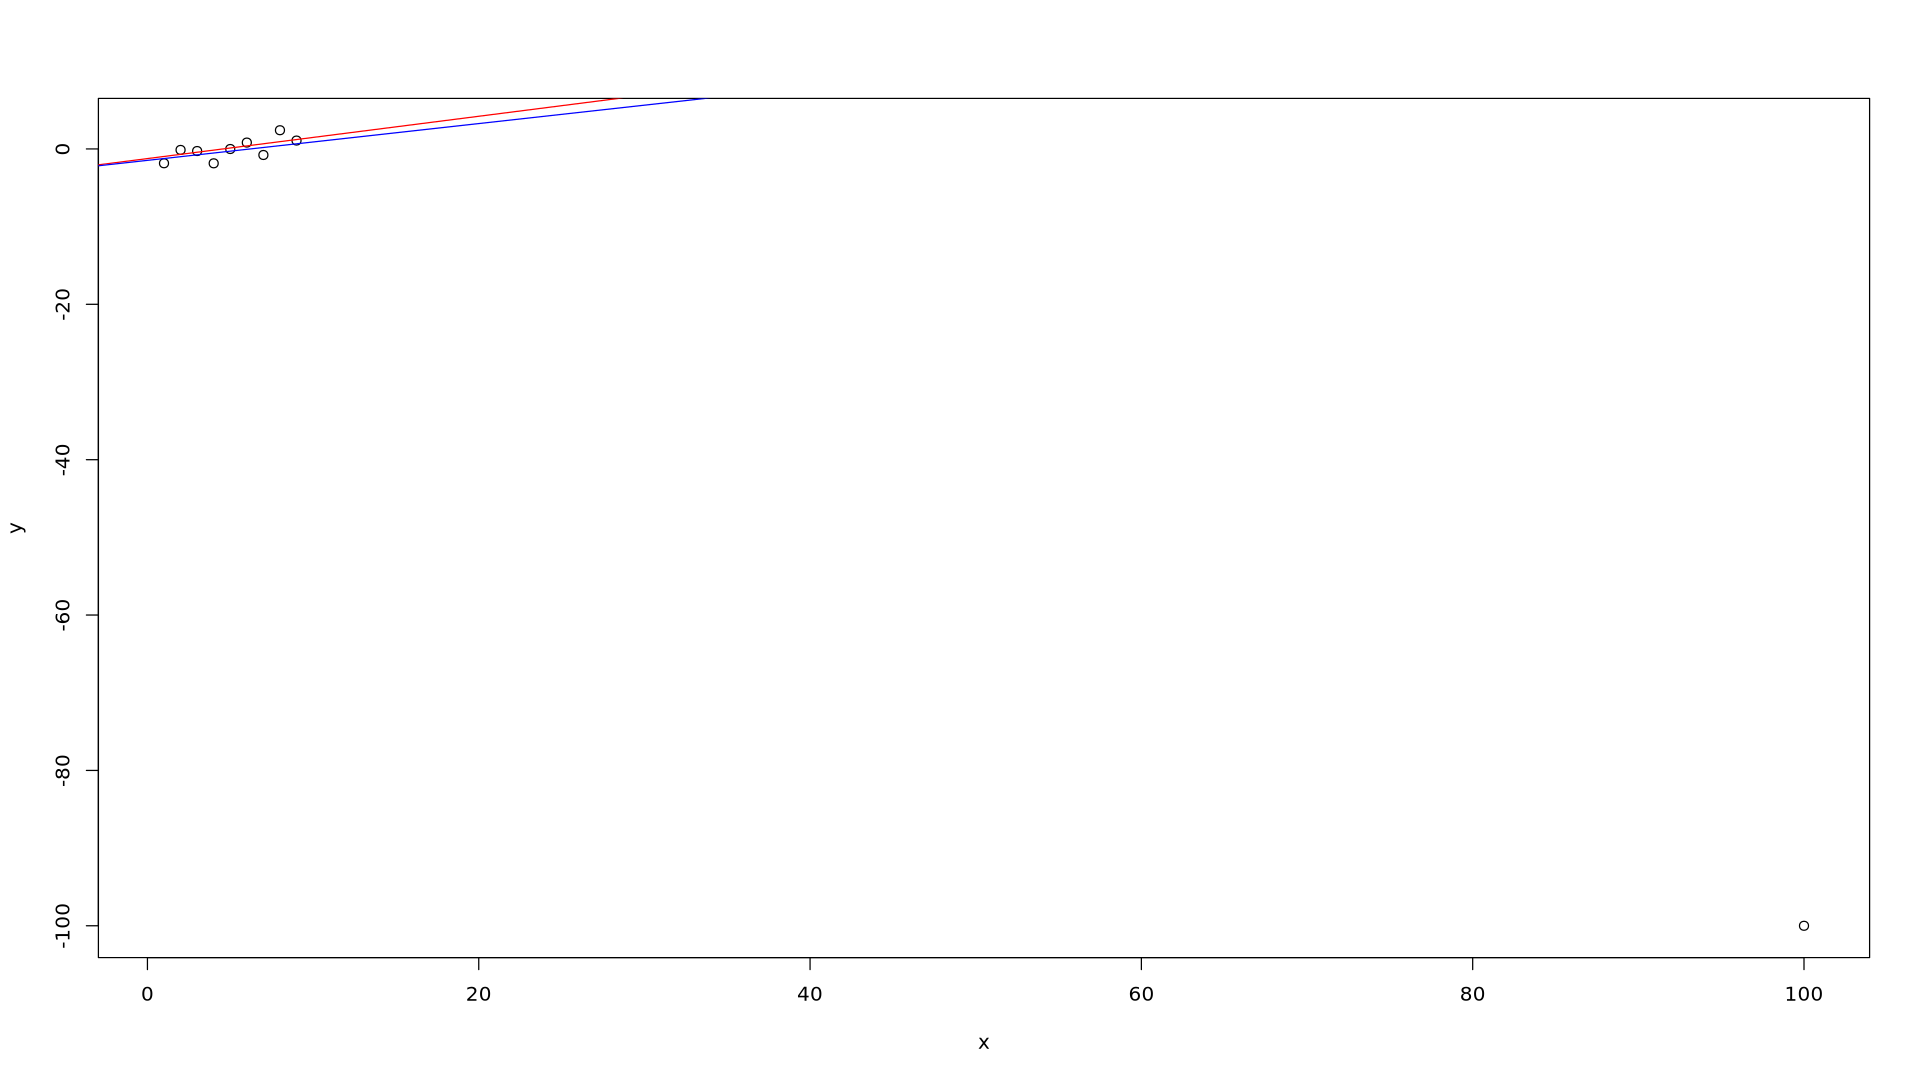

In [39]:
set.seed(1234567)
x = seq(1, 10)
y = -2.5 + 0.5*x + rnorm(10, 0, 1)
x[10] = 100
y[10] = -100

m2a <- lqs(y~x, method = 'lts')
m2b <- lqs(y~x, method = 'lts', quantile = 8)  ## 잔차의 9, 10분위수(20%)에 해당하는 자료를 버리고 추정

plot(y~x)
abline(m2a, col = 'red')
abline(m2b, col = 'blue')

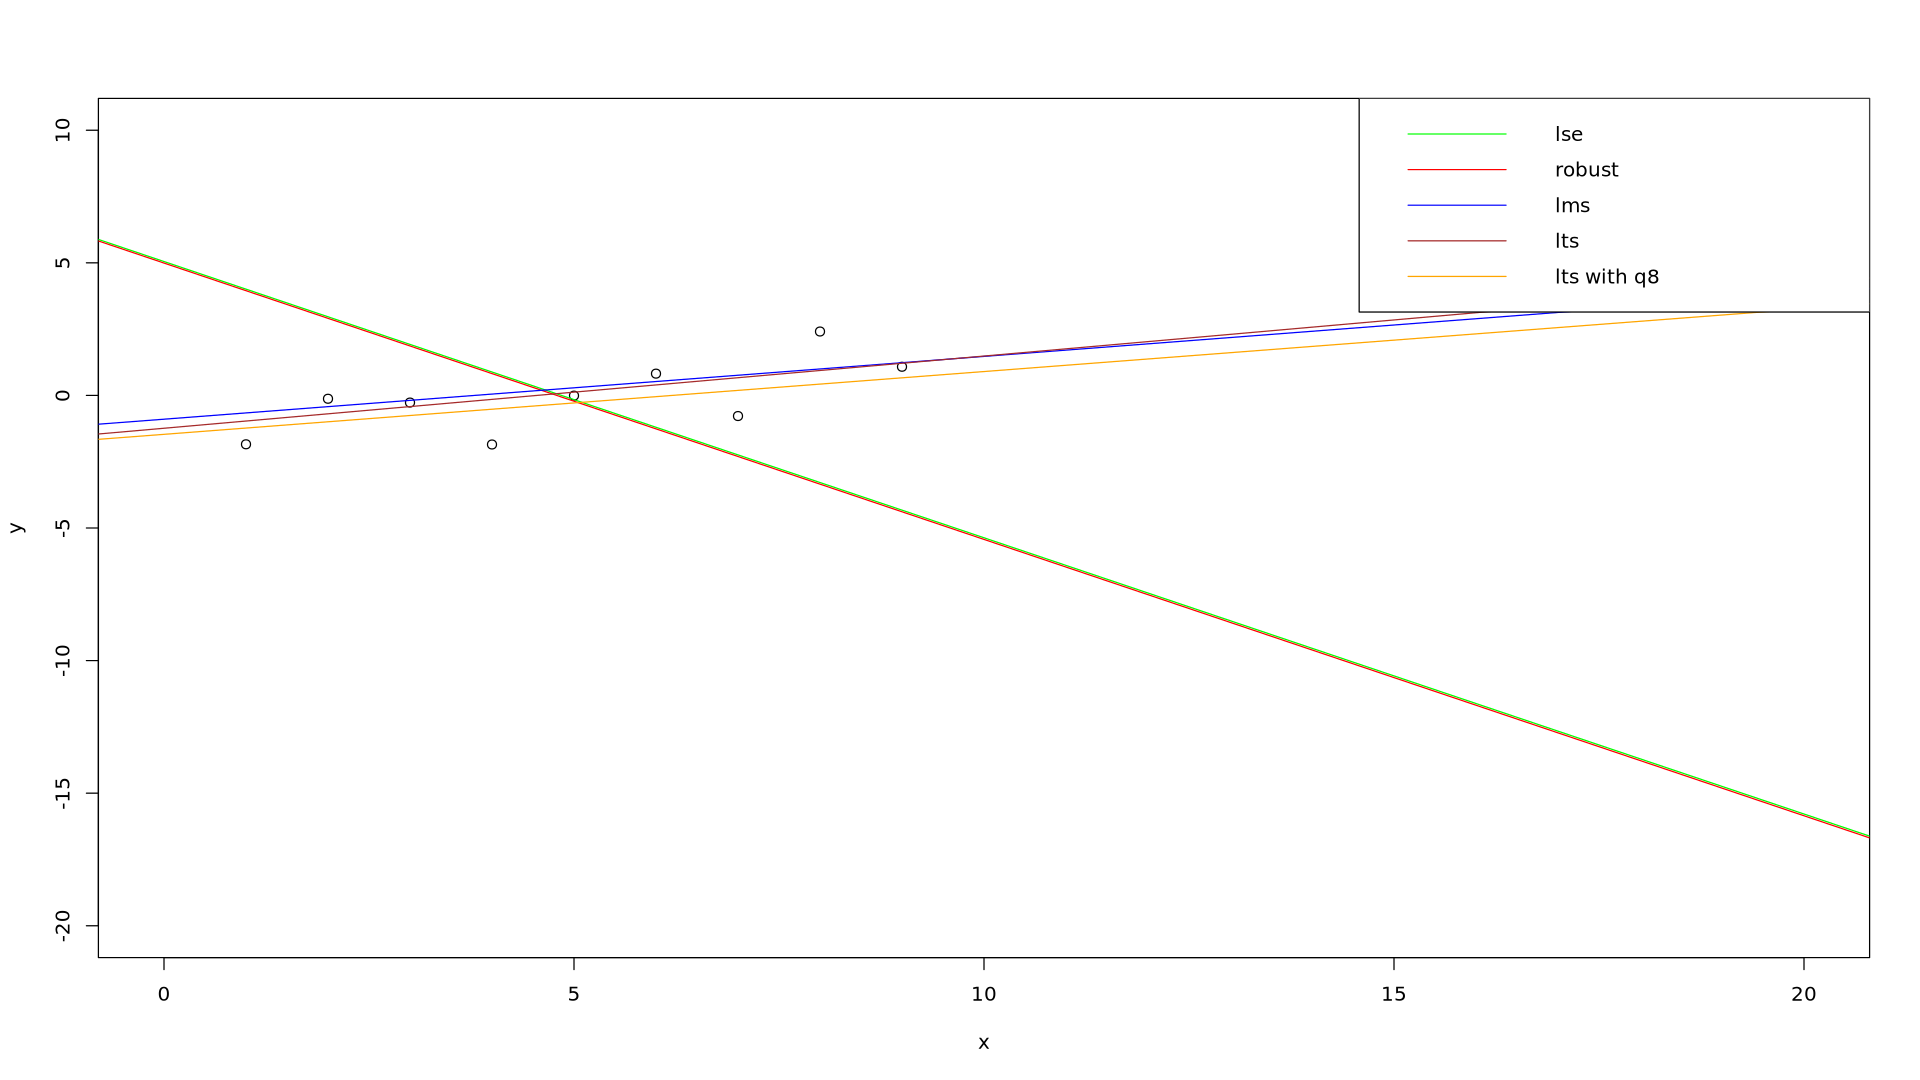

In [50]:
m0 <- lm(y~x)
m1 <- rlm(y~x)
m2 <- lqs(y~x, method = 'lms')
m3 <- lqs(y~x, method = 'lts')
m4 <- lqs(y~x, method = 'lts', quantile = 8)

plot(y~x, xlim = c(0, 20), ylim = c(-20, 10))
abline(m0, col = 'green')
abline(m1, col = 'red')
abline(m2, col = 'blue')
abline(m3, col = 'brown')
abline(m4, col = 'orange')
legend(x = 'topright', legend = c("lse" ,'robust', 'lms', 'lts', 'lts with q8'),
       col = c("green", 'red', 'blue', 'brown', 'orange'), lty = 1)

> M 추정량 또한 이상치에 영향을 받았음. 현 시점에서 M 추정량은 그렇게 좋지 않음 ㅇㅅㅇ 근데 이상치를 막 버릴 수 있나 생각해보면 좀 그렇긴 함.

In [51]:
data(stackloss)

In [52]:
str(stackloss)

'data.frame':	21 obs. of  4 variables:
 $ Air.Flow  : num  80 80 75 62 62 62 62 62 58 58 ...
 $ Water.Temp: num  27 27 25 24 22 23 24 24 23 18 ...
 $ Acid.Conc.: num  89 88 90 87 87 87 93 93 87 80 ...
 $ stack.loss: num  42 37 37 28 18 18 19 20 15 14 ...


In [68]:
m1 <- lm(stack.loss~., stackloss)
m2 <- rlm(stack.loss~., stackloss)
m3 <- lqs(stack.loss~., stackloss, method = 'lms')
m4 <- lqs(stack.loss~., stackloss, method = 'lts', quantile = 16)

In [77]:
x <- rnorm(100)
y <- rt(100, 3)

lqs(y~x, method = 'lts', quantile = 9)

Call:
lqs.formula(formula = y ~ x, quantile = 9, method = "lts")

Coefficients:
(Intercept)            x  
     0.1679      -0.2405  

Scale estimates 0.2839 0.3586 


`-` 잔차분석

> LTS 회귀에 근거하여 잔차 $r_i$의 절대값이 4 이상인 4개 관측을 분석에서 제외할 특이점으로 간주하고, 남은 함수에 최소제곱법 적용